In [26]:
# 파이썬 웹 크롤링을 이용하여 데이터를 수집하고 분석하는 방법을 알아본다
#필요한 패키지, 모듈, 클래스 등을 import

import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# 타켓 사이트

# requests.get 이용, 사이트를 가져옴
source = requests.get('http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=')
print(source)


# BeautifulSoup(소스, 파서)이용, html.parser
soup = BeautifulSoup(source.content, 'html.parser')

#시도별 발생현황, 데이터를 가진 테이블을 찾는다
# 홈페이지 검사결과, <table class = "num, midsize">
table = soup.find('table', {'class':'midsize'})
table = soup.find('tbody')

data = []

for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    rowdata = []
    for td in tds:
        rowdata.append(td.text.replace(',',''))

    data.append(rowdata)


# 변수명 가져오기
column_name = ['합계','국내발생', '해외유입', '확진환자', '격리중', '격리해제', '사망자', '발생률']
index_name=['합계','서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주','검역']
#데이터 프레임화
df = DataFrame(data, columns=column_name, index=index_name)
print(df)



<Response [200]>
     합계 국내발생 해외유입    확진환자   격리중    격리해제   사망자     발생률
합계  511  483   28  128283  7687  118717  1879  247.42
서울  163  163    0   39895  2692   36739   464  409.87
부산   14   13    1    5286   284    4880   122  154.93
대구    8    8    0    9448   111    9116   221  387.77
인천   21   20    1    5839   185    5594    60  197.52
광주   24   23    1    2518   107    2389    22  172.86
대전    7    7    0    1835   130    1685    20  124.48
울산   19   19    0    2247   386    1823    38  195.90
세종    0    0    0     386    27     358     1  112.76
경기  138  127   11   35852  2019   33225   608  270.57
강원   12   12    0    2843   184    2609    50  184.55
충북    4    4    0    2708   112    2531    65  169.31
충남   18   18    0    3175   181    2958    36  149.59
전북   12   12    0    2033   115    1860    58  111.87
전남   10   10    0    1178   141    1026    11   63.17
경북   15   15    0    4352   294    3979    79  163.45
경남   10    9    1    4268   367    3882    19  126.97
제주   24   2

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 합계 to 검역
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   합계      19 non-null     object
 1   국내발생    19 non-null     object
 2   해외유입    19 non-null     object
 3   확진환자    19 non-null     object
 4   격리중     19 non-null     object
 5   격리해제    19 non-null     object
 6   사망자     19 non-null     object
 7   발생률     19 non-null     object
dtypes: object(8)
memory usage: 1.3+ KB


In [28]:
df.head()

,합계,국내발생,해외유입,확진환자,격리중,격리해제,사망자,발생률
합계,511,483,28,128283,7687,118717,1879,247.42
서울,163,163,0,39895,2692,36739,464,409.87
부산,14,13,1,5286,284,4880,122,154.93
대구,8,8,0,9448,111,9116,221,387.77
인천,21,20,1,5839,185,5594,60,197.52


In [29]:
df.tail()

,합계,국내발생,해외유입,확진환자,격리중,격리해제,사망자,발생률
전남,10,10,0,1178,141,1026,11,63.17
경북,15,15,0,4352,294,3979,79,163.45
경남,10,9,1,4268,367,3882,19,126.97
제주,24,23,1,816,110,705,1,121.66
검역,12,0,12,3604,242,3358,4,-


In [31]:
df['합계'] = df['합계'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 합계 to 검역
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   합계      19 non-null     int32 
 1   국내발생    19 non-null     object
 2   해외유입    19 non-null     object
 3   확진환자    19 non-null     object
 4   격리중     19 non-null     object
 5   격리해제    19 non-null     object
 6   사망자     19 non-null     object
 7   발생률     19 non-null     object
dtypes: int32(1), object(7)
memory usage: 1.3+ KB


In [35]:
df['국내발생'] = df['국내발생'].astype(int)
df['해외유입'] = df['해외유입'].astype(int)
df['확진환자'] = df['확진환자'].astype(int)
df['격리중'] = df['격리중'].astype(int)
df['격리해제'] = df['격리해제'].astype(int)
df['사망자'] = df['사망자'].astype(int)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 합계 to 검역
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   합계      19 non-null     int32 
 1   국내발생    19 non-null     int32 
 2   해외유입    19 non-null     int32 
 3   확진환자    19 non-null     int32 
 4   격리중     19 non-null     int32 
 5   격리해제    19 non-null     int32 
 6   사망자     19 non-null     int32 
 7   발생률     19 non-null     object
dtypes: int32(7), object(1)
memory usage: 836.0+ bytes


In [37]:
df.describe()

,합계,국내발생,해외유입,확진환자,격리중,격리해제,사망자
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,53.789474,50.842105,2.947368,13503.473684,809.157895,12496.526316,197.789474
std,119.075410,113.040928,7.027515,29923.055469,1805.585970,27688.382815,438.437070
min,0.000000,0.000000,0.000000,386.000000,27.000000,358.000000,1.000000
25%,10.000000,8.500000,0.000000,2140.000000,113.500000,1841.500000,19.500000
50%,14.000000,13.000000,0.000000,3175.000000,184.000000,2958.000000,50.000000
75%,22.500000,21.500000,1.000000,5562.500000,330.500000,5237.000000,100.500000
max,511.000000,483.000000,28.000000,128283.000000,7687.000000,118717.000000,1879.000000


In [38]:
df1 = df.drop('합계')

In [39]:
df1

,합계,국내발생,해외유입,확진환자,격리중,격리해제,사망자,발생률
서울,163,163,0,39895,2692,36739,464,409.87
부산,14,13,1,5286,284,4880,122,154.93
대구,8,8,0,9448,111,9116,221,387.77
인천,21,20,1,5839,185,5594,60,197.52
광주,24,23,1,2518,107,2389,22,172.86
대전,7,7,0,1835,130,1685,20,124.48
울산,19,19,0,2247,386,1823,38,195.90
세종,0,0,0,386,27,358,1,112.76
경기,138,127,11,35852,2019,33225,608,270.57
강원,12,12,0,2843,184,2609,50,184.55


In [40]:
df1.describe()  #기술통계량

,합계,국내발생,해외유입,확진환자,격리중,격리해제,사망자
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,28.388889,26.833333,1.555556,7126.833333,427.055556,6595.388889,104.388889
std,45.092244,43.973588,3.649693,11403.712127,717.421074,10544.101028,167.436077
min,0.000000,0.000000,0.000000,386.000000,27.000000,358.000000,1.000000
25%,10.000000,8.250000,0.000000,2086.500000,112.750000,1832.250000,19.250000
50%,13.000000,12.500000,0.000000,3009.000000,182.500000,2783.500000,44.000000
75%,20.500000,19.750000,1.000000,5052.500000,291.500000,4654.750000,75.500000
max,163.000000,163.000000,12.000000,39895.000000,2692.000000,36739.000000,608.000000


In [42]:
df1.sum(axis=0)

합계                                                    511
국내발생                                                  483
해외유입                                                   28
확진환자                                               128283
격리중                                                  7687
격리해제                                               118717
사망자                                                  1879
발생률     409.87154.93387.77197.52172.86124.48195.90112....
dtype: object

In [43]:
p = df1['국내발생'].plot
plt.show()

In [72]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

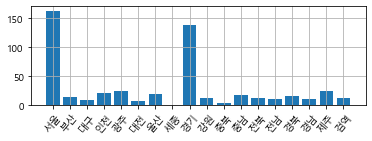

In [104]:
import matplotlib.pyplot as plt

%matplotlib inline

figure = plt.figure()
axes = figure.add_subplot(2, 1, 1)

x= df1.index
y = df1['합계']


#print(x)
#print(y)
#axes.plot(x,y)
axes.bar(x,y)
plt.xticks(rotation=50)
plt.grid(True)

plt.show()

In [68]:
!pip install seaborn

In [87]:
a = df1['확진환자']
print(a)

서울    39895
부산     5286
대구     9448
인천     5839
광주     2518
대전     1835
울산     2247
세종      386
경기    35852
강원     2843
충북     2708
충남     3175
전북     2033
전남     1178
경북     4352
경남     4268
제주      816
검역     3604
Name: 확진환자, dtype: int32


In [107]:
a = df1['격리해제']
print(a)

서울    36739
부산     4880
대구     9116
인천     5594
광주     2389
대전     1685
울산     1823
세종      358
경기    33225
강원     2609
충북     2531
충남     2958
전북     1860
전남     1026
경북     3979
경남     3882
제주      705
검역     3358
Name: 격리해제, dtype: int32


In [112]:

c = DataFrame(b)
d = DataFrame(c)
b = d.transpose()

In [113]:
b

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
격리해제,36739,4880,9116,5594,2389,1685,1823,358,33225,2609,2531,2958,1860,1026,3979,3882,705,3358


In [115]:
df1

,합계,국내발생,해외유입,확진환자,격리중,격리해제,사망자,발생률
서울,163,163,0,39895,2692,36739,464,409.87
부산,14,13,1,5286,284,4880,122,154.93
대구,8,8,0,9448,111,9116,221,387.77
인천,21,20,1,5839,185,5594,60,197.52
광주,24,23,1,2518,107,2389,22,172.86
대전,7,7,0,1835,130,1685,20,124.48
울산,19,19,0,2247,386,1823,38,195.90
세종,0,0,0,386,27,358,1,112.76
경기,138,127,11,35852,2019,33225,608,270.57
강원,12,12,0,2843,184,2609,50,184.55


In [123]:
!pip install openpyxl

In [125]:

df.to_excel('covid19.xlsx', sheet_name ='test1')

In [127]:
df2 = df1.transpose()

In [128]:
df2

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
합계,163,14,8,21,24,7,19,0,138,12,4,18,12,10,15,10,24,12
국내발생,163,13,8,20,23,7,19,0,127,12,4,18,12,10,15,9,23,0
해외유입,0,1,0,1,1,0,0,0,11,0,0,0,0,0,0,1,1,12
확진환자,39895,5286,9448,5839,2518,1835,2247,386,35852,2843,2708,3175,2033,1178,4352,4268,816,3604
격리중,2692,284,111,185,107,130,386,27,2019,184,112,181,115,141,294,367,110,242
격리해제,36739,4880,9116,5594,2389,1685,1823,358,33225,2609,2531,2958,1860,1026,3979,3882,705,3358
사망자,464,122,221,60,22,20,38,1,608,50,65,36,58,11,79,19,1,4
발생률,409.87,154.93,387.77,197.52,172.86,124.48,195.90,112.76,270.57,184.55,169.31,149.59,111.87,63.17,163.45,126.97,121.66,-


In [143]:
# 필요한 행만 가져오기

df3 = df2.loc[['합계'],:]

In [144]:
df3

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
합계,163,14,8,21,24,7,19,0,138,12,4,18,12,10,15,10,24,12


In [146]:
df3.index

Index(['합계'], dtype='object')

SyntaxError: invalid syntax (<ipython-input-148-ab51c7653cfe>, line 1)